# <center> Netflix Movie Recommendation System </center>


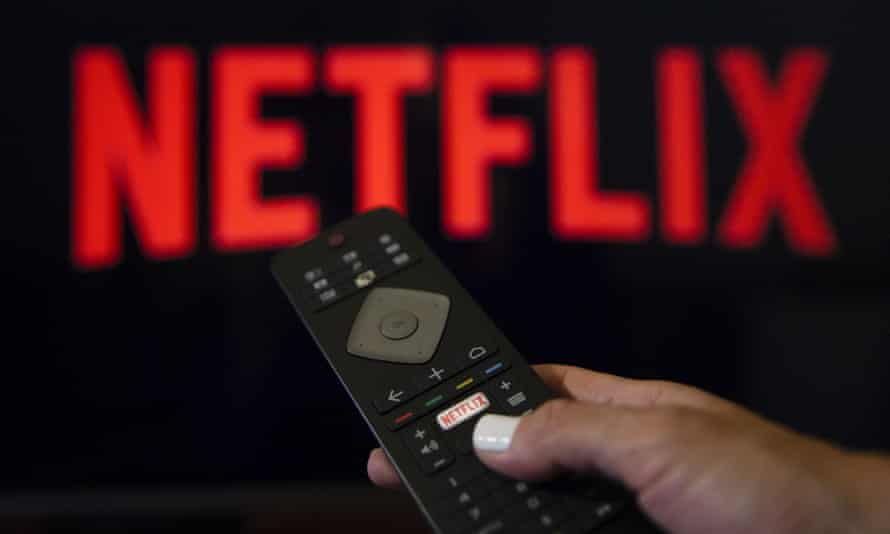

## Movie Recommendation Web App

![image](https://media.giphy.com/media/BBPwFJYcJ9tCoioTPX/giphy.gif)

In [1]:
#import required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(12,8)})

In [2]:
#load dataset
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [3]:
#only select the movies
movies = df[df['type']=='Movie'].reset_index()

## Exploratory Data Analysis
 <h4> 1. Understanding the variables </h4>

In [4]:
movies.head(2)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [5]:
movies.drop(['index'], axis=1, inplace=True)

In [6]:
#check for the number of rows and cols
movies.shape

(6131, 12)

In [7]:
movies['show_id'] = [x for x in range(1,6132)]

In [8]:
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   int64 
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(2), object(10)
memory usage: 574.9+ KB


In [10]:
#check missing values 
missing_percentage = movies.isnull().sum()/movies.shape[0]*100

In [11]:
missing_percentage.to_list()

[0.0,
 0.0,
 0.0,
 3.0663839504159194,
 7.7475126406785195,
 7.17664328820747,
 0.0,
 0.0,
 0.032621105855488504,
 0.048931658783232745,
 0.0,
 0.0]

In [12]:
clms = movies.columns.to_list()
missing_percentage = missing_percentage.to_list()

<BarContainer object of 12 artists>

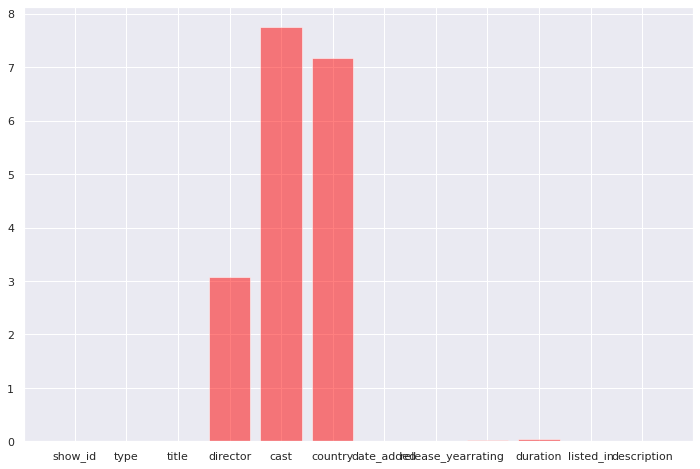

In [13]:
plt.bar(clms, missing_percentage, color='red', alpha=0.5)

# ax = sns.barplot(x=clms, y= missing_percentage,palette="Set3")

<p> <strong><font color='orange'>director</font></strong> has about <strong><font color='orange'>3%</font></strong>, <strong><font color='orange'>cast</font></strong> has about<strong><font color='orange'>8%</font></strong> and country has <strong><font color='orange'>7%</font></strong> of missing values.
 

In [14]:
# movies[movies['director'].isnull()]
# movies[movies['country'].isnull()]
# movies[movies['country'].isnull()]

<h3> Split date_added column into two new columns </h3>

In [15]:
movies['date_added'].value_counts()

January 1, 2020      97
November 1, 2019     75
March 1, 2018        72
December 31, 2019    67
October 1, 2018      64
                     ..
October 28, 2017      1
October 27, 2017      1
October 26, 2017      1
October 24, 2017      1
January 11, 2020      1
Name: date_added, Length: 1533, dtype: int64

In [16]:
def split_year(x):
    return x.split(',')[1].strip()

In [17]:
#testing
m1 = movies['date_added'][1]
m1.split(' ')[0]

'September'

In [18]:
def split_month(x):
    return x.split(' ')[0].strip()

In [19]:
#splitting values
movies['year_added'] = [split_year(x) for x in movies['date_added']]
movies['month_added'] = [split_month(x) for x in movies['date_added']]

In [20]:
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,2,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September


In [21]:
movies['year_added'].value_counts()

2019    1424
2020    1284
2018    1237
2021     993
2017     839
2016     253
2015      56
2014      19
2011      13
2013       6
2012       3
2009       2
2008       1
2010       1
Name: year_added, dtype: int64

[Text(0.5, 1.0, 'Number of movies released by Year')]

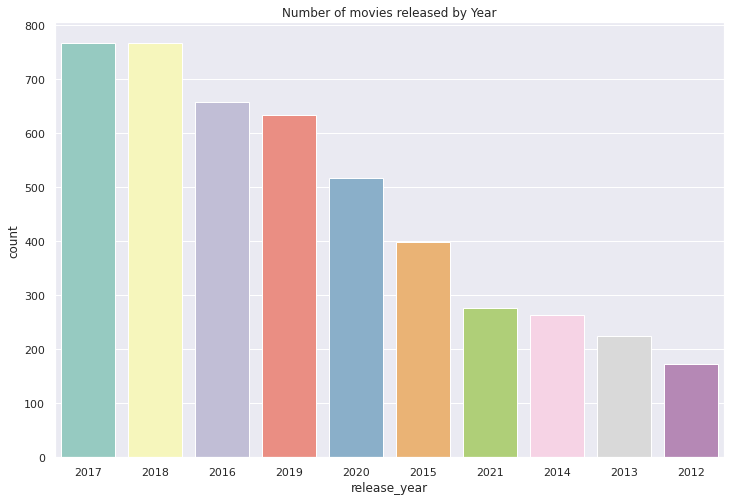

In [22]:
sns.countplot(x="release_year", data=movies,order = movies['release_year'].value_counts().index[:10],palette="Set3").set(title='Number of movies released by Year')

[Text(0.5, 1.0, 'Number of movies added by Year')]

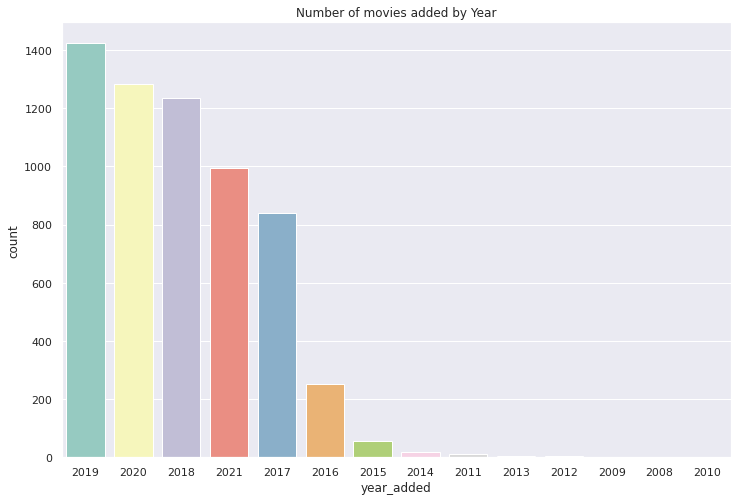

In [23]:

sns.countplot(x="year_added", data=movies,order = movies['year_added'].value_counts().index,palette="Set3").set(title='Number of movies added by Year')

<h3> Movie Rating </h3>

In [24]:
#check rating column
movies['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [25]:
wrong_rating_value = ['74 min', '84 min', '66 min']

In [26]:
def correct_rating(x):
    for i in wrong_rating_value:
        if x==i:
            x = x.replace(x, ' ')
        else:
            x=x
    return x

In [27]:
movies['rating'] = [correct_rating(x) for x in movies['rating']]

In [28]:
movies['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
               3
UR             3
Name: rating, dtype: int64

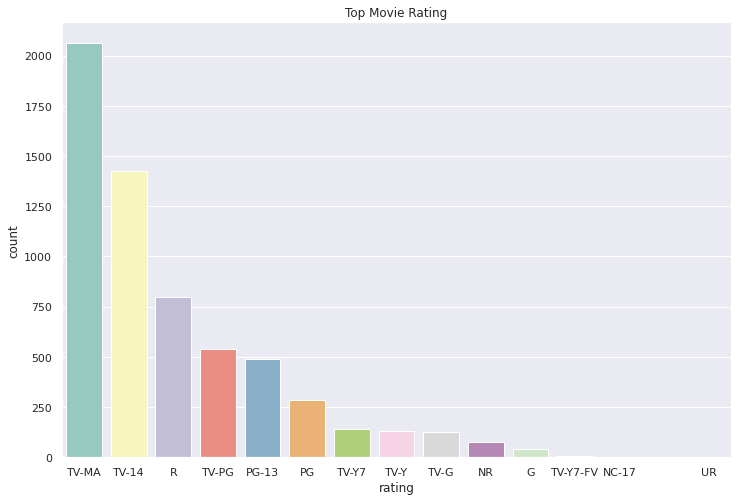

In [29]:

ax = sns.countplot(x="rating", data=movies, order = movies['rating'].value_counts().index,palette="Set3").set(title= 'Top Movie Rating')

<h3> Top Genre  </h3>

In [30]:
movies['listed_in'].value_counts()

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Sci-Fi & Fantasy                                      1
Sports Movies                                         1
Children & Family Movies, Comedies, Cult Movies       1
Cult Movies, Dramas, Music & Musicals                 1
Cult Movies, Dramas, Thrillers                        1
Name: listed_in, Length: 278, dtype: int64

[Text(0.5, 1.0, 'Top 10 Movie Genre')]

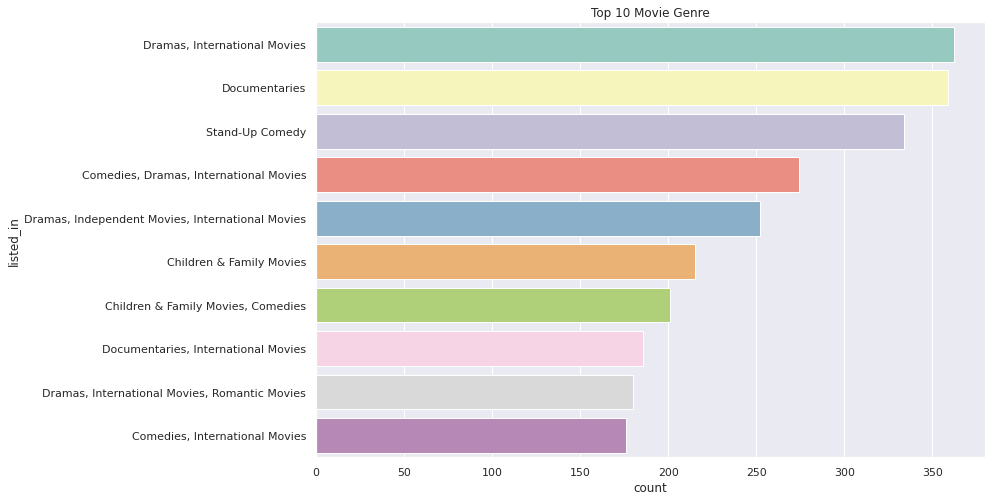

In [31]:
# plt.barh('listed_in', 'show_id',data=listed_in_df, color='red', alpha=0.5)

sns.countplot(y="listed_in", data=movies,order = movies['listed_in'].value_counts().index[:10],palette="Set3").set(title='Top 10 Movie Genre')

<h3> The most movie production countries </h3>

In [32]:
movies['country'].value_counts()

United States                            2058
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

[Text(0.5, 1.0, 'Top 10 Movie Production Countries')]

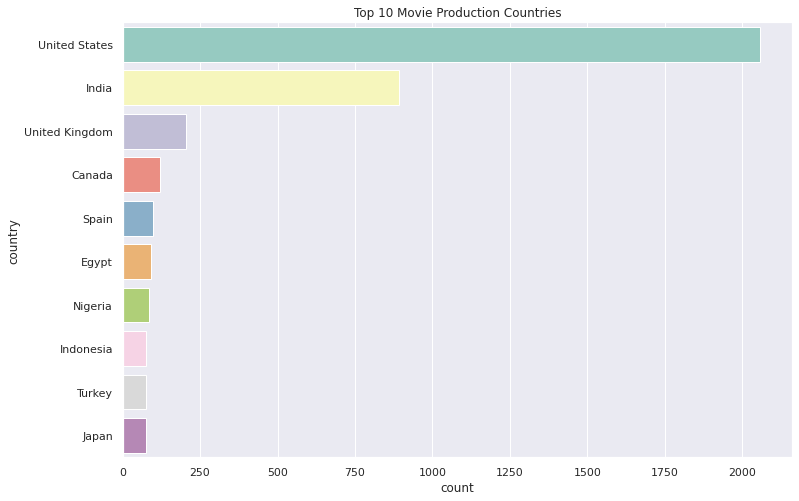

In [33]:
sns.countplot(y="country", data=movies,order = movies['country'].value_counts().index[:10],palette="Set3").set(title='Top 10 Movie Production Countries')

<h2> Recommendation System </h2>

<p> we're going to build a content-based recommendation system. Firstly, let's check the description.</p> 

In [34]:
movies['description'].head()

0    As her father nears the end of his life, filmm...
1    Equestria's divided. But a bright-eyed hero be...
2    On a photo shoot in Ghana, an American model s...
3    A woman adjusting to life after a loss contend...
4    After most of her family is murdered in a terr...
Name: description, dtype: object

In [35]:
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,2,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September


In [36]:
#fill with space whenever found a NaN value
movies.fillna(value = '',inplace = True)

<p> create a <font color='orange'> 'combined_feature'</font> to add all the features that we want to use in the process of recommendation </p>

In [37]:
movies['combined_features']= movies['director']+" "+movies['cast']+ " "+ movies['rating']+ " "+ movies['listed_in']+ " "+ movies['description']

In [38]:
movies['combined_features'] =movies['combined_features']

In [39]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(",", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(",", ""))
        else:
            return ''

In [40]:
movies['combined_features'] = movies['combined_features'].apply(clean_data)

In [41]:
movies['combined_features']

0       kirsten johnson  pg-13 documentaries as her fa...
1       robert cullen josé luis ucha vanessa hudgens k...
2       haile gerima kofi ghanaba oyafunmike ogunlano ...
3       theodore melfi melissa mccarthy chris o'dowd k...
4       christian schwochow luna wedler jannis niewöhn...
                              ...                        
6126    majid al ansari ali suliman saleh bakri yasa a...
6127    david fincher mark ruffalo jake gyllenhaal rob...
6128    ruben fleischer jesse eisenberg woody harrelso...
6129    peter hewitt tim allen courteney cox chevy cha...
6130    mozez singh vicky kaushal sarah-jane dias raag...
Name: combined_features, Length: 6131, dtype: object

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(movies['combined_features'])

In [43]:
count_matrix.shape

(6131, 40533)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix)

In [45]:
movies['title']= movies['title'].str.lower()

In [46]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [47]:
def get_recommendations(title, cosine_sim=cosine_sim):
    if title.lower() in [i for i in movies['title'].str.lower()]:
        idx = indices[title.lower()]
    
        sim_scores = list(enumerate(cosine_sim[idx]))

        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        sim_scores = sim_scores[1:11]

        movie_indices = [i[0] for i in sim_scores]
        
        mov_list = movies['title'].iloc[movie_indices]
        
        print('Recommended Movies for  \' {} \' in decending order'.format(title))
        print('-'*(48+len(title)))
        print(*mov_list, sep = "\n")

    else:
        print('We have no movie to recommend for \' {} \' at that time. Try with other similar movies.'.format(title))
    

In [48]:
get_recommendations('Happy Old Year')

Recommended Movies for  ' Happy Old Year ' in decending order
--------------------------------------------------------------
the light of my eyes
seven (tamil)
sadece sen
that thing called tadhana
exes baggage
dry martina
one-way to tomorrow
beiimaan love
nang nak
the reconquest
